<h1 style="color:#8A2BE2; text-align:center; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight:700; font-size:36px; margin-bottom:5px;">
  E-Commerce Customer Satisfaction – EDA Report
</h1>

<div style="text-align:center; font-family:'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size:16px; color:#666; margin-top:8px;">
  Weronika Wójcik (266902) | Mahmoud Youssef (288861)
</div>


#### This notebook performs a full Exploratory Data Analysis (EDA) for two datasets based on the CRISP-DM methodology.

# Dataset 1: E-commerce Customer Behavior
## 1. Business Understanding
The goal is to analyze customer satisfaction levels and determine which factors influence it the most in the context of an e-commerce platform.

## 2. Data Understanding
Loading and viewing the dataset.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image

In [2]:
path = 'datasets/E-commerce Customer Behavior - Sheet1.csv'
df = pd.read_csv(path)

print(df.head())

   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  
3               

## 3. Data Preparation
Encoding categorical variables to numerical for correlation analysis.

In [3]:
df_encoded = df.copy()
for col in ['Gender', 'City', 'Membership Type', 'Discount Applied', 'Satisfaction Level']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])
df_encoded.head(10)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,1120.20,14,4.6,1,25,1
1,102,1,34,2,2,780.50,11,4.1,0,18,0
2,103,0,43,0,0,510.75,9,3.4,1,42,2
3,104,1,30,5,1,1480.30,19,4.7,0,12,1
4,105,1,27,3,2,720.40,13,4.0,1,55,2
5,106,0,37,1,0,440.80,8,3.1,0,22,0
6,107,0,31,4,1,1150.60,15,4.5,1,28,1
7,108,1,35,2,2,800.90,12,4.2,0,14,0
8,109,0,41,0,0,495.25,10,3.6,1,40,2
9,110,1,28,5,1,1520.10,21,4.8,0,9,1


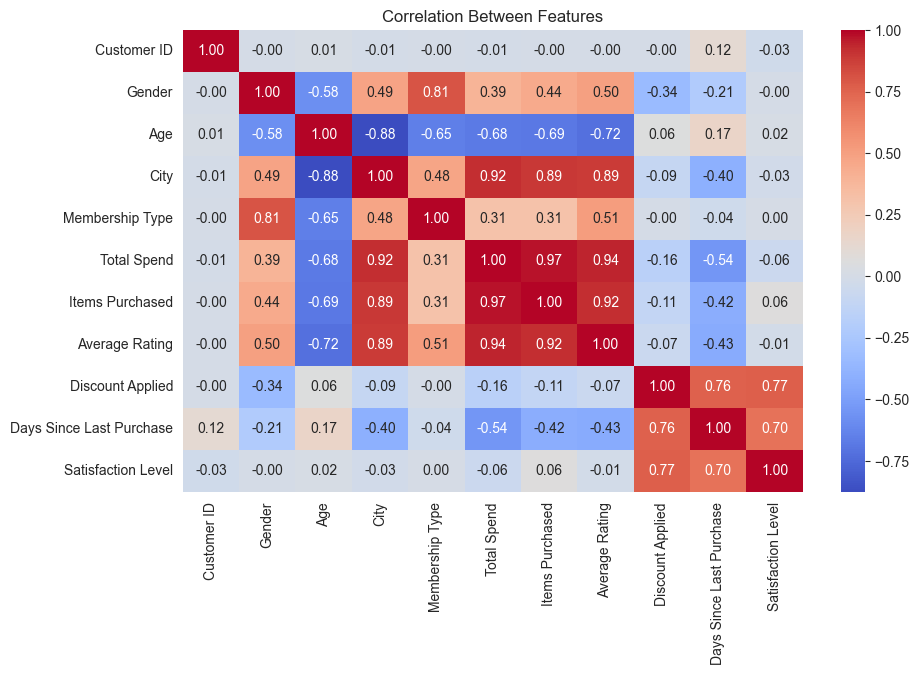

In [4]:
plt.figure(figsize=(10, 6))
numerical_cols = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Features")
plt.show()

## 4. Exploratory Data Analysis (EDA)

### 4.1 General Satisfaction Overview
Distribution plot of `Satisfaction Level` to understand the overall customer satisfaction.

Satisfaction Level
Satisfied      35.919540
Unsatisfied    33.333333
Neutral        30.747126
Name: proportion, dtype: float64


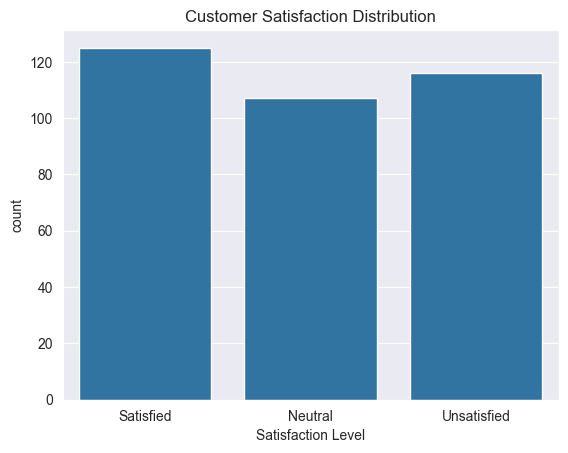

In [5]:
sns.countplot(data=df, x='Satisfaction Level')
plt.title('Customer Satisfaction Distribution')
print(df['Satisfaction Level'].value_counts(normalize=True) * 100)

### 4.2 Satisfaction Level by Age
1. Checking age distribution in the dataset.
2. Analyzing satisfaction levels across different age groups and ages.

Age range: 26-43


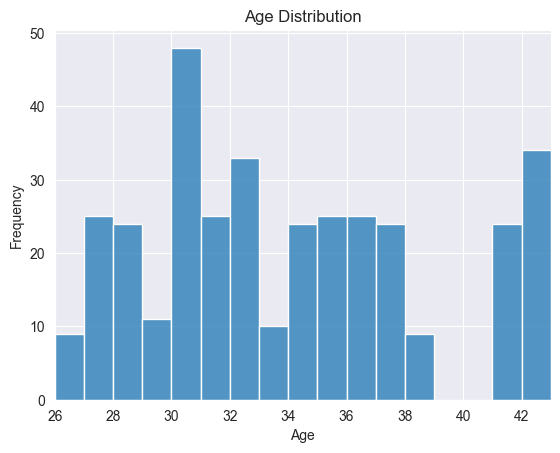

In [6]:
min_age = df['Age'].min()
max_age = df['Age'].max()
print(f"Age range: {min_age}-{max_age}")

sns.histplot(df['Age'], bins=17)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(min_age, max_age)
plt.show()

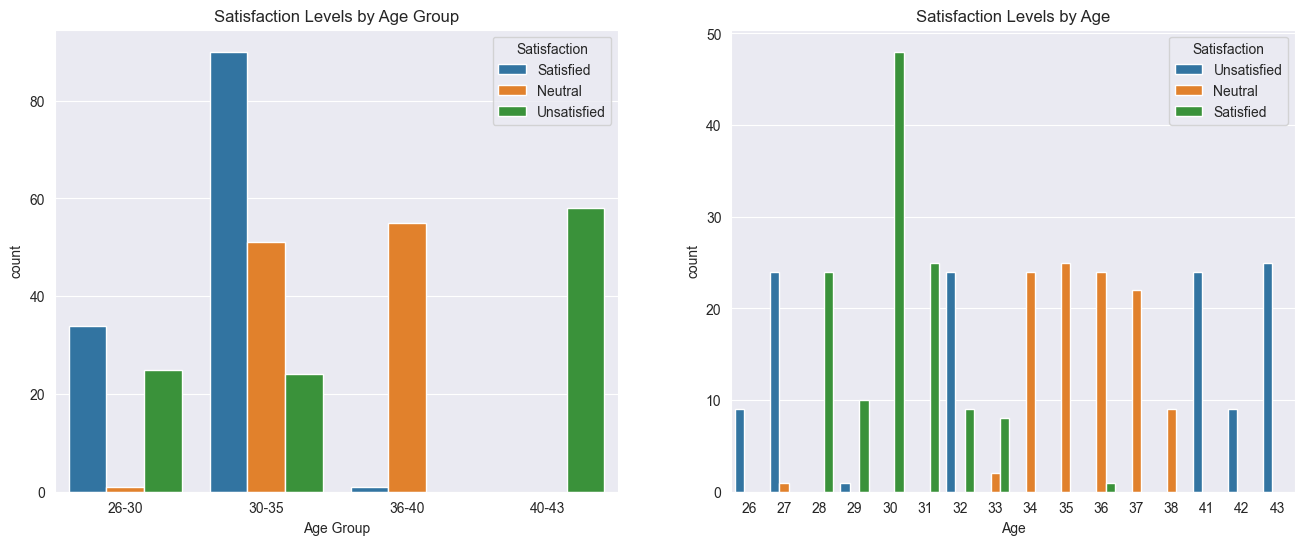

In [7]:
age_bins = [26, 29, 35, 40, 43]
age_labels = ['26-30', '30-35', '36-40', '40-43']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df, x='Age Group', hue='Satisfaction Level', ax=axes[0])
axes[0].set_title('Satisfaction Levels by Age Group')
axes[0].legend(title='Satisfaction')

sns.countplot(data=df, x='Age', hue='Satisfaction Level', ax=axes[1])
axes[1].set_title('Satisfaction Levels by Age')
axes[1].legend(title='Satisfaction')

plt.show()

### 4.3 Boxplots for Numerical Features
Analysis of numerical features against satisfaction levels.

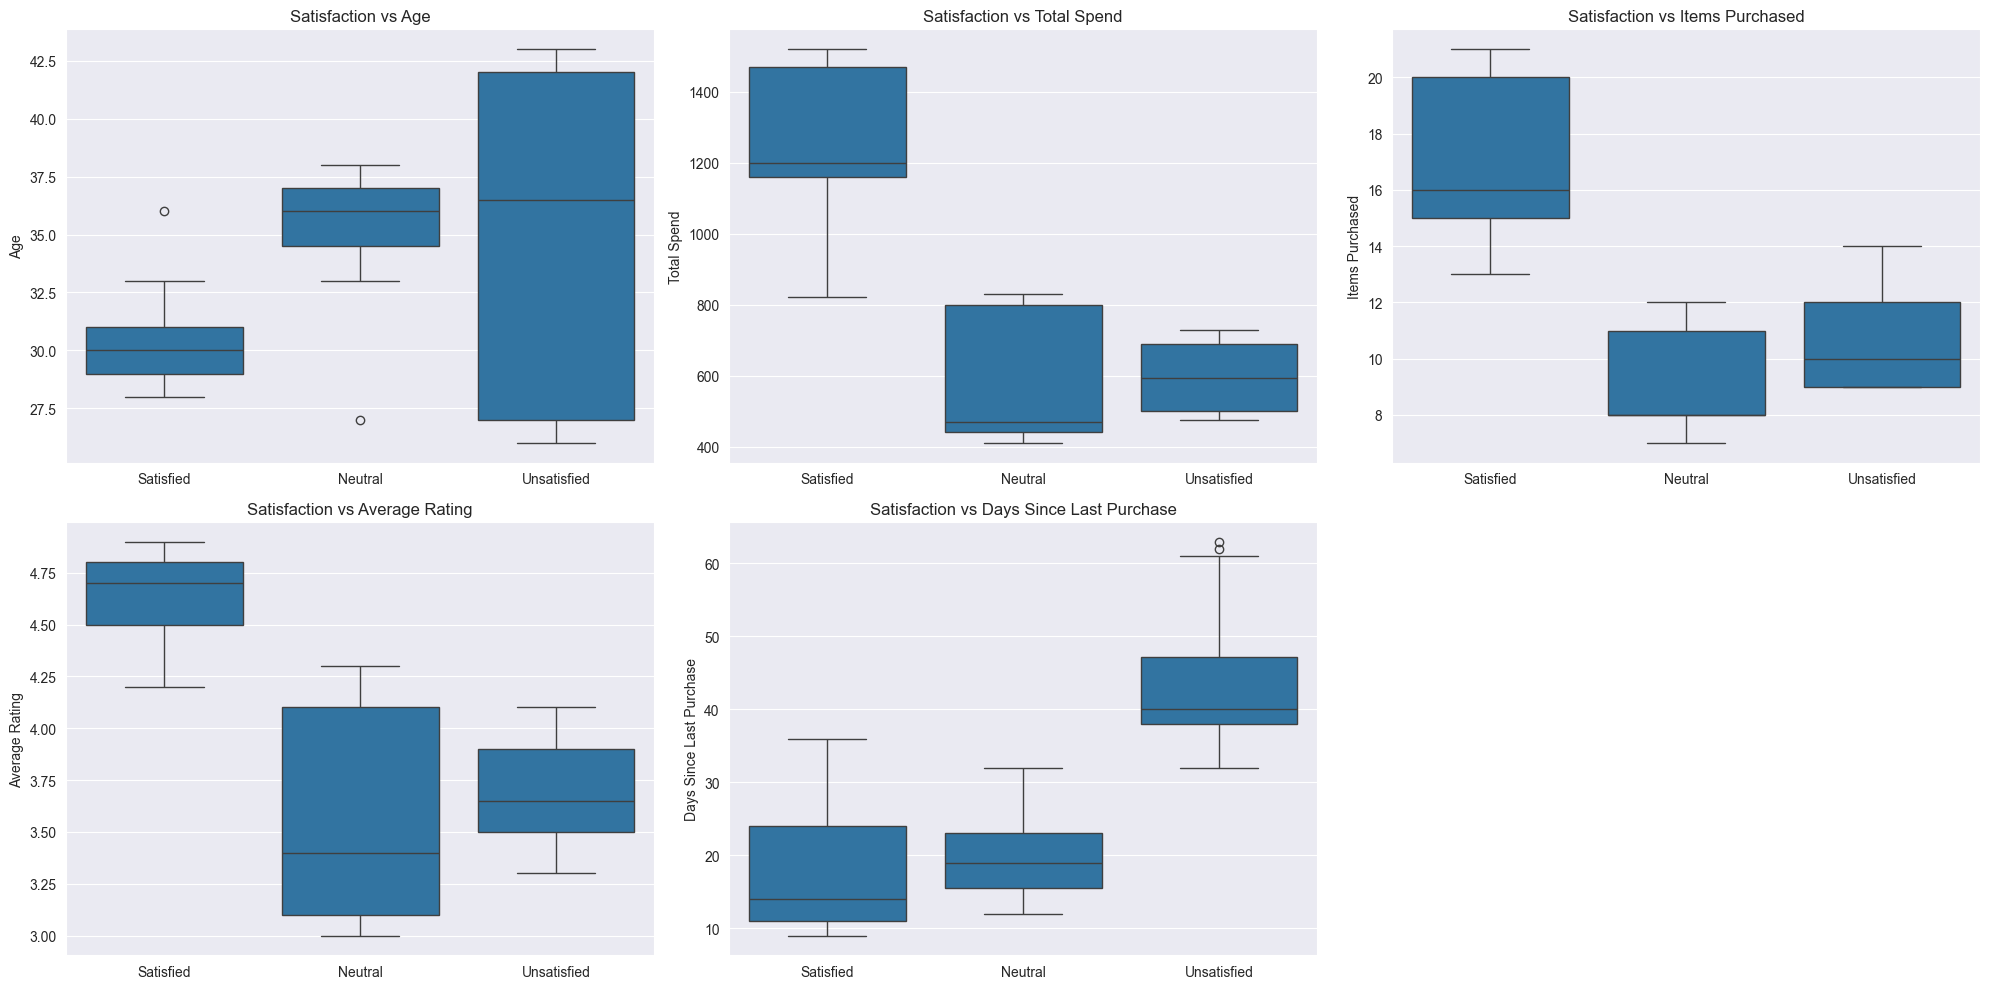

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='Satisfaction Level', y=col, ax=axes[i])
    axes[i].set_title(f'Satisfaction vs {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### 1. Satisfaction vs Age

- **Satisfied** customers tend to be **younger**, typically in their late 20s to early 30s.
- **Neutral** customers are slightly older on average.
- **Unsatisfied** customers span a wider age range, including older individuals (up to ~43), which may indicate that older customers are harder to satisfy.

**Insight:** There may be an opportunity to tailor marketing or services specifically for older customers to improve their satisfaction levels.

---

### 2. Satisfaction vs Total Spend

- **Satisfied** customers spend the most, with a high median and a wider upper range.
- **Neutral** and **Unsatisfied** customers have lower and similar spending ranges, though unsatisfied customers tend to have a slightly lower median.

**Insight:** There is a positive correlation between satisfaction and total spending. Implementing loyalty programs or incentives could encourage higher spending and satisfaction.

---

### 3. Satisfaction vs Items Purchased

- **Satisfied** customers tend to purchase more items (median around 16–20).
- **Neutral** and **Unsatisfied** customers purchase significantly fewer items (median around 9–11).

**Insight:** High purchase frequency is associated with higher satisfaction. Strategies that promote repeat purchases may help increase customer satisfaction.

---

### 4. Satisfaction vs Average Rating

- **Satisfied** customers give high average ratings (4.5–4.9).
- **Neutral** customers have more varied ratings, generally between 3.0 and 4.3.
- **Unsatisfied** customers give lower ratings (3.2–3.9), with no overlap with the "Satisfied" group.

**Insight:** Customer satisfaction is strongly aligned with average product or service ratings. Enhancing the customer experience can lead to improved satisfaction.

---

### 5. Satisfaction vs Days Since Last Purchase

- **Satisfied** customers made a purchase more recently (median around 15 days).
- **Neutral** and **Unsatisfied** customers show longer inactivity, especially the unsatisfied group (some more than 60 days since the last purchase).

**Insight:** Time since last purchase is a useful early indicator of satisfaction. Prompt follow-up strategies could re-engage potentially unsatisfied customers.

---

## Summary of Key Influencers

| Feature                   | Influence Strength | Key Insight                                                        |
|--------------------------|--------------------|---------------------------------------------------------------------|
| Average Rating           | Strong             | Best indicator of satisfaction                                     |
| Total Spend              | Moderate           | High spenders are generally more satisfied                         |
| Items Purchased          | Moderate           | Frequent buyers tend to be more satisfied                          |
| Days Since Last Purchase | Weak to Moderate   | Longer gaps in activity suggest possible dissatisfaction           |
| Age                      | Weak               | Slight trend of older users being less satisfied; needs attention  |

### 4.4 Membership Type and Gender dependency

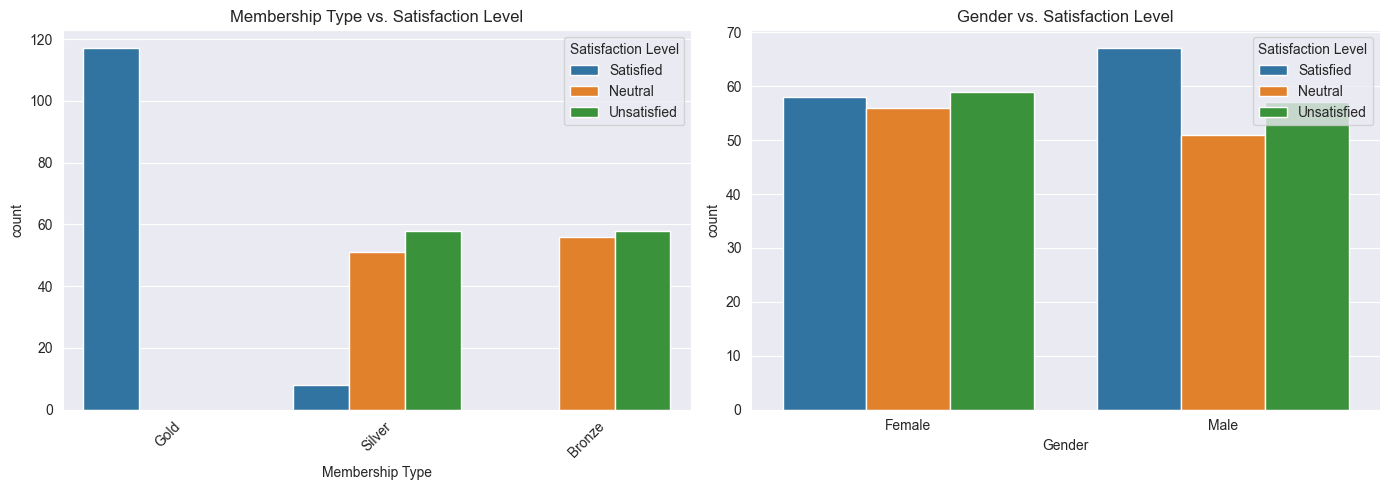

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='Membership Type', hue='Satisfaction Level', ax=axes[0])
axes[0].set_title('Membership Type vs. Satisfaction Level')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='Gender', hue='Satisfaction Level', ax=axes[1])
axes[1].set_title('Gender vs. Satisfaction Level')

plt.tight_layout()
plt.show()

### 1. Membership Type vs. Satisfaction Level

| Membership | Satisfied | Neutral | Unsatisfied | Key Take-Away |
|------------|-----------|---------|-------------|---------------|
| Gold       | Very high (≈ 118) | 0       | 0           | Gold members are overwhelmingly satisfied. |
| Silver     | Low (≈ 8)         | Moderate (≈ 51) | Moderate-to-high (≈ 58) | Majority of Silver members are not satisfied (neutral or unsatisfied). |
| Bronze     | 0                 | Moderate (≈ 56) | Moderate-to-high (≈ 58) | Bronze mirrors Silver: no reported satisfaction. |

**Interpretation:**

- Satisfaction appears to be strongly tied to membership tier.
- Gold membership delivers on expectations; lower tiers do not.
- The sharp contrast suggests that the value proposition (benefits, service levels, or expectations) for Silver/Bronze tiers is falling short.

---

### 2. Gender vs. Satisfaction Level

| Gender | Satisfied | Neutral | Unsatisfied | Key Take-Away |
|--------|-----------|---------|-------------|---------------|
| Female | ≈ 58      | ≈ 56    | ≈ 59        | Distribution is fairly even across all three satisfaction levels. |
| Male   | ≈ 67      | ≈ 51    | ≈ 57        | Slightly higher satisfaction than females, but differences are modest. |

**Interpretation:**

- Gender effects are minor compared with membership effects.
- Both genders show a wide spread of satisfaction responses.
- Males lean slightly more toward “Satisfied,” yet both genders contain sizeable unsatisfied segments that warrant attention.


# Dataset 2: Google Merch Store Engagement
**Period:** April 16–18, 2025  
**Data Source:** Google Analytics 4 (GA4)

## 1. Executive Summary
This report analyzes user behavior on the Google Merch Store over a 3-day period. While homepage visits and event volume are high, user engagement depth and conversion intent are notably low.
### Key Highlights:
- **75%** of active users stay on the homepage, with minimal progression to product pages.
- **109K** events recorded, but critical conversion signals are scarce.
- Users average **1 min 26 sec** per session, with only **0.82** engaged sessions per user.

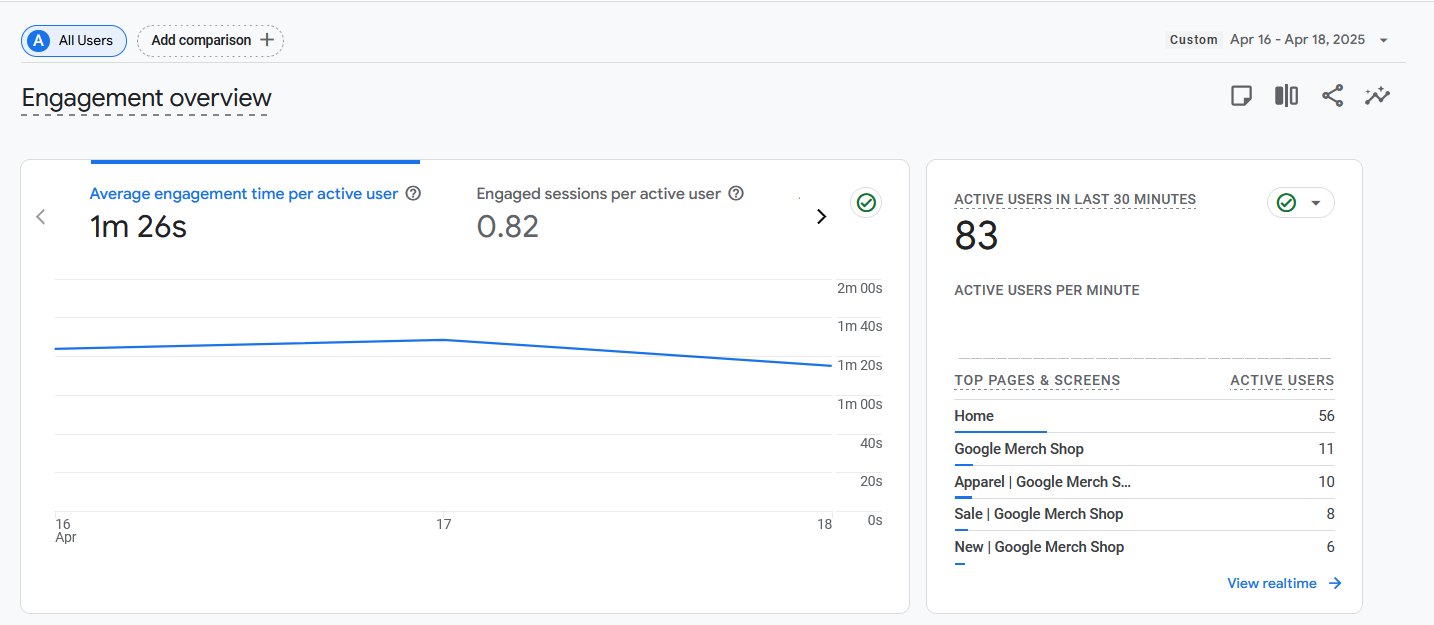

## 2. Data Overview
### Key Metrics
| Metric                         | Value             |
|-------------------------------|-------------------|
| Avg. Engagement Time/User     | 1 minute 26 sec   |
| Engaged Sessions per User     | 0.82              |
| Total Views                   | 28,000            |
| Total Events                  | 109,000           |

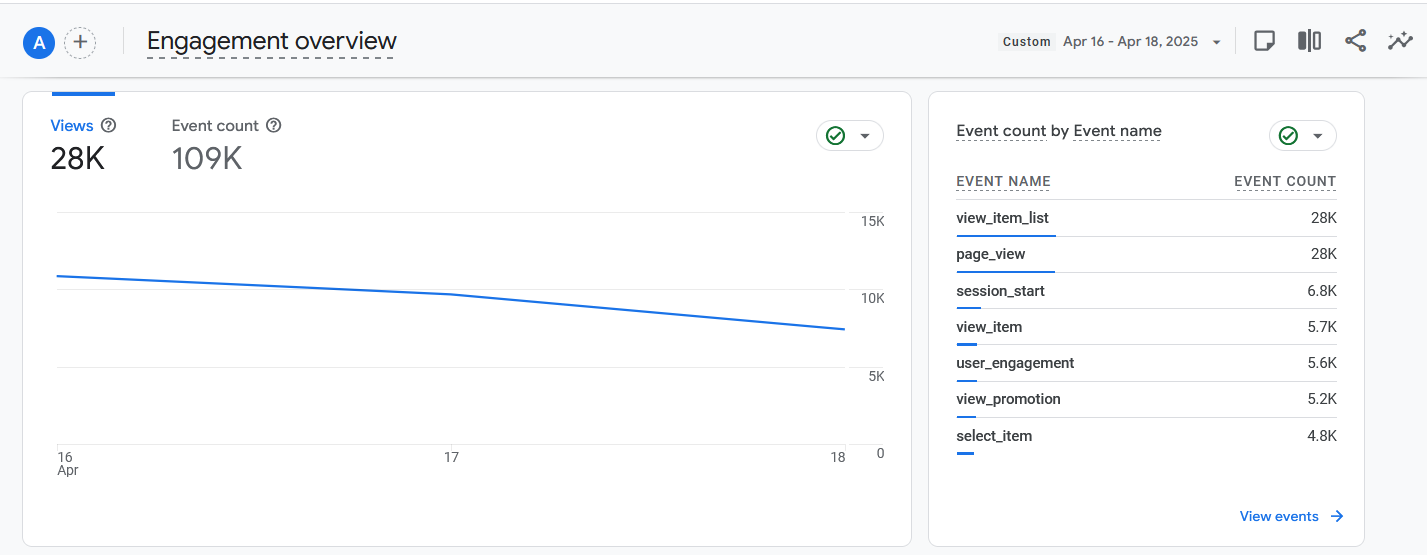

## 3. User Engagement Analysis
### 3.1 Real-Time Activity (Last 30 Minutes)
- **Homepage Dominance:** 61 out of 81 users (75%) remain on the homepage.
- **Category Page Breakdown:**
    - Apparel: 9 users
    - Sale Page: 7 users
    - Men’s/Unisex: 5 users
> **Insight:** Users are landing but not flowing into deeper funnel stages.
### 3.2 Engagement Depth
- **Engaged Sessions/User:** 0.82
- **Avg. Engagement Time:** 86 seconds
> **Insight:** Users spend some time on-site but don’t engage further via interactions like wishlisting or exploring reviews.

## 4. Event Analysis
### Top Events (April 16–18)
| Event Name         | Count   | Funnel Stage            |
|--------------------|---------|--------------------------|
| view_item_list     | 28,000  | Awareness/Discovery      |
| page_view          | 28,000  | Initial Interest         |
| session_start      | 6,800   | Entry Point              |
| view_item          | 5,700   | Product Consideration    |
| select_item        | 4,800   | Pre-Conversion Intent    |
### Gaps Identified
- **Missing Conversion Data:** No records for `add_to_cart`, `checkout`, or `purchase`.
- **High Drop-Off:** From `view_item_list` (28K) to `select_item` (4.8K) – **83% drop**.
- **Underperforming Promotions:** `view_promotion` = 5.2K, lower than browsing metrics.

## 5. Page Views & User Activity Snapshot

### 5.1. Views by Page Title
| Page Title                       | Views  |
|----------------------------------|--------|
| Home                             | 5.6K   |
| Google Merch Shop                | 2.5K   |
| Apparel                          | 1.3K   |
| Men’s / Unisex                   | 1.1K   |
| New                              | 898    |
| Bags                             | 816    |
| Sale                             | 799    |

**Insight:**  
Homepage dominates traffic (5.6K views), but key category and promotion pages (e.g., *Sale*, *New*) have low engagement—highlighting drop-offs in product exploration.

### 5.2. User Activity Over Time
| Period       | Active Users |
|--------------|--------------|
| Last 30 Days | 50K          |
| Last 7 Days  | 12K          |
| Last 1 Day   | 1.5K         |

**Insight:**  
User base is steady, but short session depth and low activity on key pages signal shallow interaction.

**Recommendation:**  
- Add clear CTAs on homepage to drive traffic to *Sale* and *New* pages.  
- A/B test layout changes to boost deeper engagement.  
- Highlight underperforming categories with banners or popups.


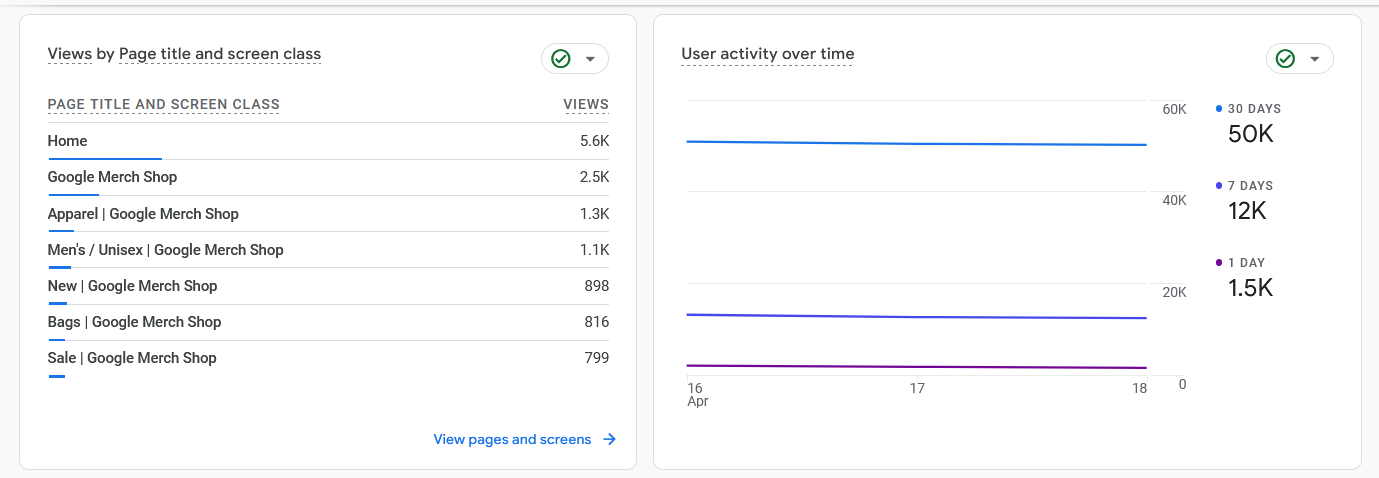

## 6. Customer Behavior Model Graph

The following visualizations illustrate the Customer Behavior Model Graph (CBMG) for users interacting with the online shop. These graphs help to understand how users navigate through the website, where they drop off, and which touchpoints drive conversions:

### 6.1. pages and screens data   


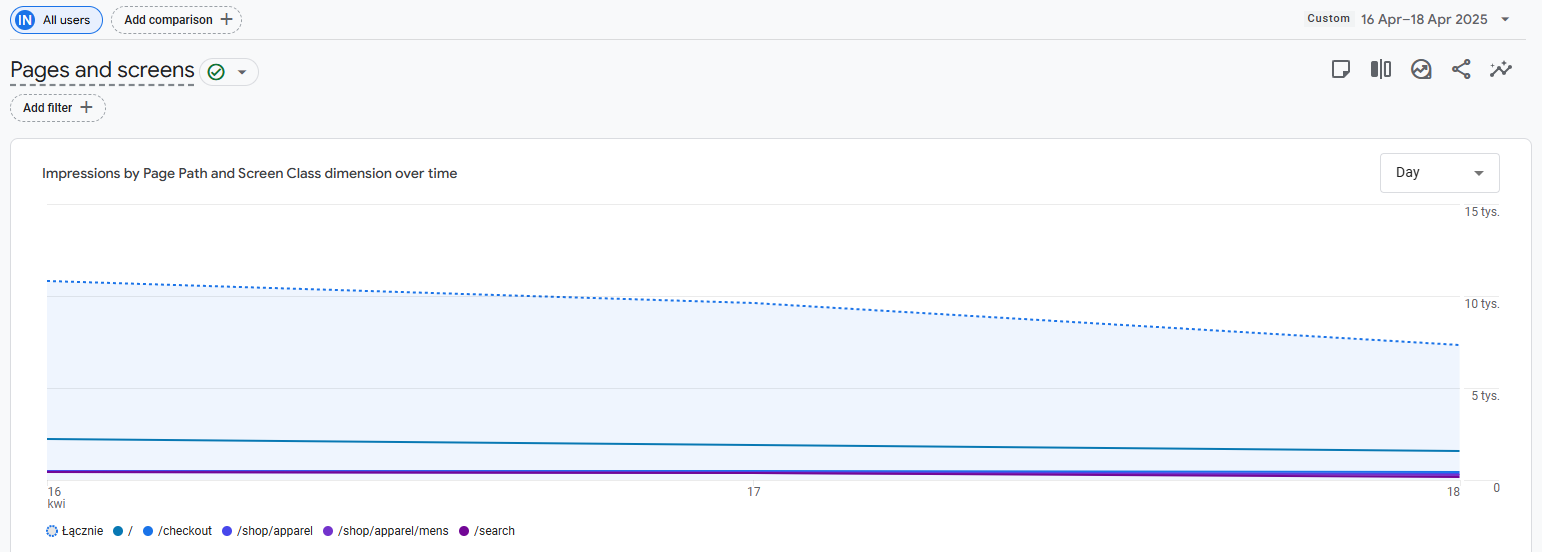

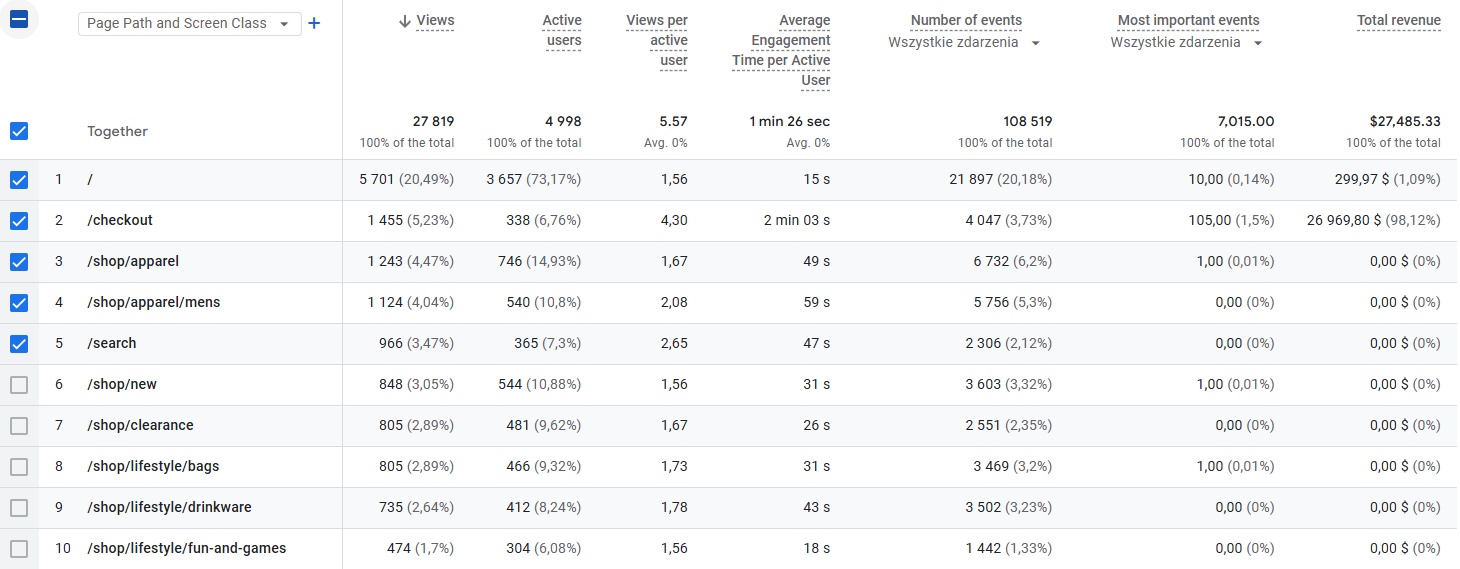

### 6.2. Customer Behavior Model Graph

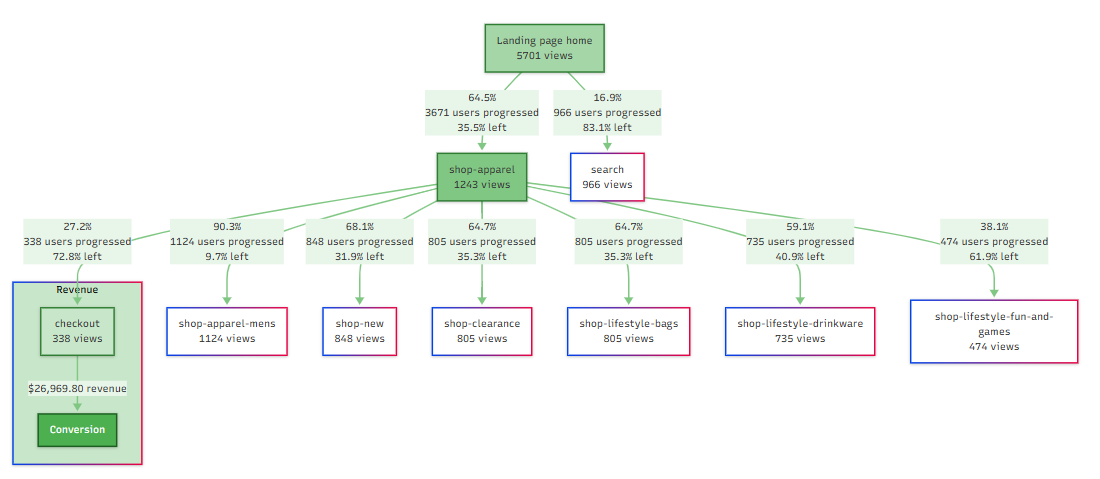

## 7. Key Insights

### ✅ Strengths
- Strong traffic flow (27.8K views) and 5K active users.
- Real-time activity shows consistent visibility (~1.5K users/day).
- Homepage and apparel sections attract the most attention.
- Clear transition from homepage to specific product categories like "Mens Apparel" and "Bags".

### ❌ Weaknesses
- Drop-off rate increases significantly after product category pages.
- High engagement time on checkout page, but only one path leads to revenue ($26,969 from 338 users).
- No interaction recorded for "add_to_cart" or "purchase" events — conversion funnel is incomplete.
- Promotional categories (e.g., Sale, New, Fun & Games) underperform in both engagement and retention.

<div style="background: #f9f9f9; border-left: 6px solid #4CAF50; padding: 16px; font-family: Arial, sans-serif; font-size: 16px; line-height: 1.6;">
  <h2 style="color: #333; margin-top: 0;">📌 Conclusion</h2>
  <p>The <strong>Google Merch Store</strong> continues to attract strong traffic and offers an intuitive first-step user journey.</p>
  <p>However, the <strong>conversion path</strong> is heavily skewed, with a majority of users dropping off after visiting product category pages.</p>
  <p>While the <strong>checkout page performs well</strong>, it receives limited traffic.</p>
  <p>To improve engagement and revenue, it is crucial to:</p>
  <ul style="margin: 0; padding-left: 20px;">
    <li>Optimize navigation for smoother funnel flow</li>
    <li>Increase visibility and engagement on underperforming categories</li>
    <li>Implement complete conversion tracking (e.g., <code>add_to_cart</code>, <code>begin_checkout</code>, <code>purchase</code>)</li>
  </ul>
</div>

